# **Activity 5: Text Classification**


**Instructions:**

---
1. Please download the provided IPython Notebook (ipynb) file and open it in Google Colab. Once opened, enter your code in the same file directly beneath the relevant question's code block.
2. Insert a text block below your code to briefly explain it, mentioning any libraries or functions utilized. Conclude your activity with a comprehensive explanation of your overall approach in the final section of the notebook.

3. Submit
  *   The IPython Notebook (ipynb) file.
  *   A PDF version of the notebook (converted from ipynb).

4. The similarity score should be less than 15%


#**Text Classification**

###What is Text Classification?

Text Classification forms a fundamental part of Natural Language Processing. In today’s digital age, we are surrounded by text on our social media accounts, commercials, websites, Ebooks, etc. The majority of this text data is unstructured, so classifying this data can be extremely useful.

##Applications

Text Classification has a wide array of applications. Some popular uses are:

    Spam detection in emails
    Sentiment analysis of online reviews
    Topic labeling documents (e.g., research papers)
    Language detection like in Google Translate
    Age/gender identification of anonymous users
    Tagging online content
    Speech recognition used in virtual assistants like Siri or Alexa

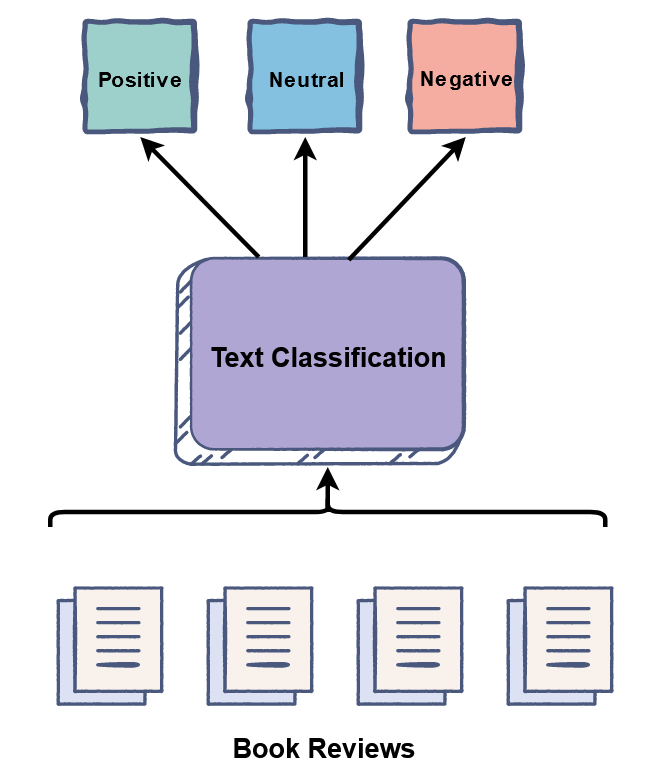

- The above is an example of a book review where we have classified text as 'Positive', 'Negative', or 'Neutral' using text classification.

In [52]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# Sample dataset
dataset = [
    ["I liked the movie", "positive"],
    ["It's a good movie. Nice story", "positive"],
    ["Hero's acting is bad but heroine looks good. Overall nicemovie", "positive"],
    ["Nice songs. But sadly boring ending.", "negative"],
    ["Sad movie, boring movie", "negative"],
]

# Create a DataFrame from the dataset
dataset = pd.DataFrame(dataset)
dataset.columns = ["Text", "Reviews"]

# Download NLTK stopwords
nltk.download("stopwords")

corpus = []
# Text preprocessing
for i in range(0, 5):
    text = re.sub(r"[^a-zA-Z]", " ", dataset["Text"][i])  # Replace non-alphabetic characters with spaces
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenization
    ps = PorterStemmer()
    text = " ".join([ps.stem(word) for word in text])  # Join tokens
    corpus.append(text)

# Create a bag of words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset["Reviews"].values

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit Gaussian Naive Bayes to the training set
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict test set results
y_pred = classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[0 0]
 [1 1]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- First, we import the required packages and libraries.
- The dataset array contains the review of a movie and the nature of the review.
- Then we divided the data into data frames of text and review.
- Then we do preprocessing in which we remove all the stopwords, remove all the punctuations, convert all words to lowercase characters, tokenize them, and apply Potter stemmer.
-  Create a bag of word model which represents the count of tokens, store the frequency of tokens.
- Next, split the dataset into a train set (75%) and a test set (25%).
- Then implement multinomal Bayes classifier which is imported from sklearn.naive_bayes.
- Then split the data and predict the test results which is a confusion matrix.
- Confusion matrix is used to measure the performance of a model. It's a matrix that contains true positive, true negative, false positive, and false negative values.


##**Question 1**
###Now calculate and display additional performance metrics, such as accuracy, precision, recall, and F1-score, for the Naive Bayes classifier.

[reference for additional performance metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html)

In [53]:
#code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='positive'))
print("Recall:", recall_score(y_test, y_pred, pos_label='positive'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='positive'))


Accuracy: 0.5
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666


- The above gives the accuracy, precision, recall and F1 score for the model.
- 0.5 accuracy means we have got 50% accuracy.

##**Decision Tree Classifier Building in Scikit-learn**
download dataset here:[dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

reference tutorial:[link](https://www.datacamp.com/tutorial/decision-tree-classification-python)


In [54]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Read the CSV file, skip the first row, and set header names
pima = pd.read_csv("diabetes.csv", skiprows=1, names=col_names)

# Split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  # Features
y = pima.label  # Target variable

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)


- First, we import the decision tree classifier.
- We use decision tree classifier to predict wheather the paitent has diabeties of not.
- We split the dataset into 75% train data and 25% test data to predict the class.



In [55]:
from sklearn import metrics

- Import metrics from sklearn to print the accuracy.

In [56]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.734375


- From the classified model prediction we get an accuracy as 73.43%.

##**Optimizing Decision Tree Performance**

**criterion** : Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Used to evaluate the quality of a split at each node in the decision tree. Supported criteria are “gini” for the Gini index and “entropy” for the information gain
**Gini Impurity**: You can use "gini" as the criterion. Gini impurity measures the probability of misclassifying a randomly chosen element if it were randomly classified.


**splitter** : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning

##**Question 2**

###Plot a decision tree on the same data with max_depth=4 and add a attribute selection measure such as "gini". Print the accuracy and compare that accuracy from prevous accuracy?



In [57]:
#code here
from sklearn.tree import plot_tree

# Create a decision tree classifier with max_depth 4 and criterion as gini.
clf = DecisionTreeClassifier(max_depth=4, criterion='gini')

# Fit the train and test data to the decision tree classifier model
clf = clf.fit(X_train, y_train)

# Predict the test dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_with_tree = metrics.accuracy_score(y_test, y_pred)
print("Accuracy with Decision Tree Classifier having max_depth=4 and criterion='gini':", accuracy_with_tree)

# Accuracy comparison
print("Difference in accuracy:", accuracy_with_tree - accuracy)


Accuracy with Decision Tree Classifier having max_depth=4 and criterion='gini': 0.7447916666666666
Difference in accuracy: 0.24479166666666663


- After tuning the decision tree using max_dept and criterion as 'gini' the accuracy of the model is 74.4% which is little bit higher than the previous decision tree classifier.


##**Question 3**
##What is the role of hyperparameter tuning in text classification, and how can it improve the model's performance?

- Hyperparameter tuning is one of the important things we can do to improve the model's performance.
- Hyperparameter tuning means finding the best-fit parameters to optimize the overall performance of the model.
- Using hyperparameter tuning the accuracy of the model increases.
- It improves the overall generalization and robustness of the model.
-  It also enhances the overall performance of the model by reducing noise, and overfitting and also handles the impalance classes.
- There are different parameters for hyperparameter tuning like max_dept, and criterion which we have seen in the above code block.
- Apart from that we also have learning_rate, splitter, etc.

###**Question 4:**
##Explain briefly the changes you have made and what you have learned  in this activity?
-->

Explanation

## Text Classsification
- Text classification means assigning tags or categories to text based on the content in it.
- There are many different applications of text classification such as spam detection in emails (email is spam or not), sentimental analysis of online reviews (whether the review is positive, negative, or angry, etc), and many more.


- The first code block was predicting the nature of the review for a movie.
- The dataset contained the review and nature of it.
- We used a data frame to separate the text and review.
- Then we did a text preprocessing which is an important step in model training and prediction.
- In text preprocessing all the stop words were removed, the text into lower case letters, tokenized then, and porter stemmer.
- Then the dataset was split into 75% training dataset and 25% dataset to test the model.
- The model was the Multinomial Naive Bayes model.
- Then we printed the confusion matrix.
- For question 1 I used sklearn.metrics to print the accuracy, precision, recall, and f1 score of the multinomial naive Bayes model.

## Decision Tree Classifier
- For the next code block we used a diabetes dataset to predict whether a patient has diabetes or not.
- To do that we used Decision Tree Classifier.
- Then we can optimize decision tree performance. There are different criteria such as parameter fine-tuning.
- Critiran decides the quality of a split in a decision tree which can be measured by Gini and Entropy.
- A splitter is a parameter that is used to split each node using some strategies.
- The Max_depth parameter controls the maximum depth of a tree.
- For question 2, I used hyperparameters like max_dept (4) and criterion (gini) to tune the model and then predict the accuracy.
- Hyperparameter tuning is an important step to improve the performance of the model and increase the accuracy.
